<a href="https://colab.research.google.com/github/Tajyu/TensorFlow-Tutotrial/blob/main/Simply_Write/%EC%A1%B0%EA%B8%B0%EC%A2%85%EB%A3%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 조기종료 지점을 찾아야한다.

## from tensorflow.keras.callbacks import EarlyStopping 
## early_stopping = EarlyStopping(monitor = "val_loss", patience = 3, min_delta = 3)
### - monitor: 모니터링 하고자 하는 값(val_loss, val_accuracy 등)
### - patience: 모니터링 하는 값의 개선이 없는 경우 몇 번의 epoch 까지 진행 할 건지 값.
### - min_delta: 개선이라고 말하고자하는 값의 크기

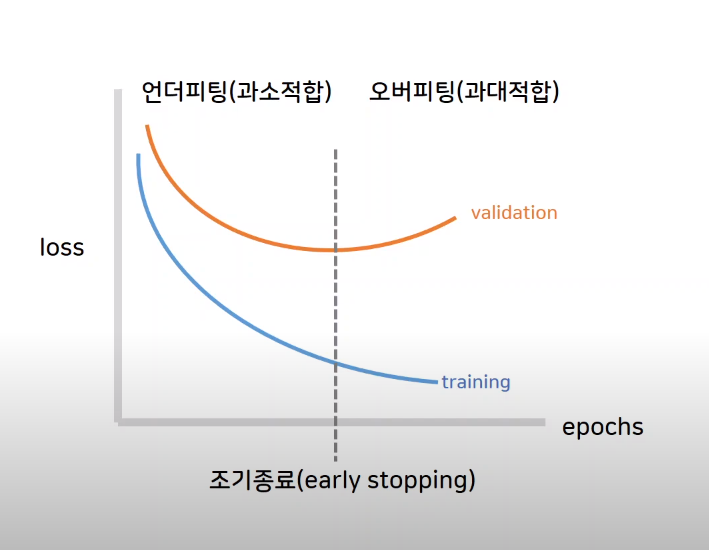

In [2]:
# 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.callbacks import EarlyStopping 

## callbacks은 학습 실행 시 손실값 등을 모니터링 하고 손실에 따라 일부 작업을 수행할 수 있다.

### val_accuracy를 모니터링

In [4]:
# Mnist 데이터세트 불러오기
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 모델 생성
model = Sequential([
                    Flatten(input_shape = (28, 28)),
                    Dense(64, activation = "relu"),
                    Dense(10, activation = "softmax")
])

# 모델 컴파일
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])


early_stopping = EarlyStopping(monitor = "val_accuracy", patience = 3)
# monitor: val_accuracy 관찰
# patience: epoch 3번까지 개선되지 않을 시 종료한다.

# 훈련(학습)
history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 30, batch_size = 64, callbacks = [early_stopping])

Epoch 1/30
750/750 [==============================] - 4s 2ms/step - loss: 4.2098 - accuracy: 0.7759 - val_loss: 0.7245 - val_accuracy: 0.8338
Epoch 2/30
750/750 [==============================] - 1s 2ms/step - loss: 0.6622 - accuracy: 0.8577 - val_loss: 0.5065 - val_accuracy: 0.8863
Epoch 3/30
750/750 [==============================] - 1s 2ms/step - loss: 0.4716 - accuracy: 0.8911 - val_loss: 0.4391 - val_accuracy: 0.8950
Epoch 4/30
750/750 [==============================] - 1s 2ms/step - loss: 0.3790 - accuracy: 0.9090 - val_loss: 0.4252 - val_accuracy: 0.9087
Epoch 5/30
750/750 [==============================] - 1s 2ms/step - loss: 0.3125 - accuracy: 0.9230 - val_loss: 0.3408 - val_accuracy: 0.9263
Epoch 6/30
750/750 [==============================] - 1s 2ms/step - loss: 0.2761 - accuracy: 0.9294 - val_loss: 0.3271 - val_accuracy: 0.9242
Epoch 7/30
750/750 [==============================] - 1s 2ms/step - loss: 0.2396 - accuracy: 0.9362 - val_loss: 0.2871 - val_accuracy: 0.9361
Epoch 

## 즉, callbacks은 val_accuracy가 증가하다가 감소하는 지점 근처에서 멈춘다.

Text(0, 0.5, 'accuarcy')

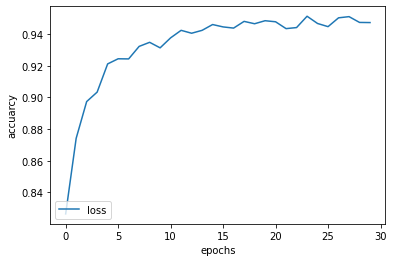

In [10]:
plt.plot(history.history["val_accuracy"])
plt.legend(history.history, loc = "lower left")
plt.xlabel("epochs")
plt.ylabel("accuarcy")

### val_loss를 모니터링

In [13]:
# Mnist 데이터세트 불러오기
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 모델 생성
model = Sequential([
                    Flatten(input_shape = (28, 28)),
                    Dense(64, activation = "relu"),
                    Dense(10, activation = "softmax")
])

# 모델 컴파일
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])


early_stopping = EarlyStopping(monitor = "val_loss", patience = 3)
# monitor: val_accuracy 관찰
# patience: epoch 3번까지 개선되지 않을 시 종료한다.

# 훈련(학습)
history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 50, batch_size = 64, callbacks = [early_stopping])

Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 3.4307 - accuracy: 0.7058 - val_loss: 0.7967 - val_accuracy: 0.8371
Epoch 2/50
750/750 [==============================] - 1s 2ms/step - loss: 0.6944 - accuracy: 0.8508 - val_loss: 0.5760 - val_accuracy: 0.8673
Epoch 3/50
750/750 [==============================] - 1s 2ms/step - loss: 0.4823 - accuracy: 0.8880 - val_loss: 0.4478 - val_accuracy: 0.9025
Epoch 4/50
750/750 [==============================] - 1s 2ms/step - loss: 0.3865 - accuracy: 0.9060 - val_loss: 0.3978 - val_accuracy: 0.9165
Epoch 5/50
750/750 [==============================] - 1s 2ms/step - loss: 0.3124 - accuracy: 0.9194 - val_loss: 0.3398 - val_accuracy: 0.9186
Epoch 6/50
750/750 [==============================] - 1s 2ms/step - loss: 0.2827 - accuracy: 0.9260 - val_loss: 0.3102 - val_accuracy: 0.9321
Epoch 7/50
750/750 [==============================] - 1s 2ms/step - loss: 0.2528 - accuracy: 0.9332 - val_loss: 0.2850 - val_accuracy: 0.9285
Epoch 

Text(0, 0.5, 'accuarcy')

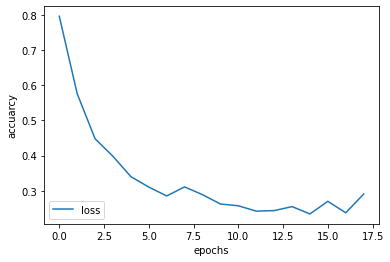

In [14]:
plt.plot(history.history["val_loss"])
plt.legend(history.history, loc = "lower left")
plt.xlabel("epochs")
plt.ylabel("accuarcy")

### min_delta 기준 미달시 조기 종료
### 3 epoch 동안 손실이 0.05 이상 개선되지 않을 경우 훈련 중지

In [15]:
# Mnist 데이터세트 불러오기
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 모델 생성
model = Sequential([
                    Flatten(input_shape = (28, 28)),
                    Dense(64, activation = "relu"),
                    Dense(10, activation = "softmax")
])

# 모델 컴파일
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])


early_stopping = EarlyStopping(monitor = "val_loss", patience = 3, min_delta = 0.05)
# monitor: val_accuracy 관찰 
# patience: epoch 3번까지 개선되지 않을 시 종료한다.

# 훈련(학습)
history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 30, batch_size = 64, callbacks = [early_stopping])

Epoch 1/30
750/750 [==============================] - 2s 2ms/step - loss: 3.4190 - accuracy: 0.7542 - val_loss: 0.7042 - val_accuracy: 0.8340
Epoch 2/30
750/750 [==============================] - 1s 2ms/step - loss: 0.6044 - accuracy: 0.8571 - val_loss: 0.5273 - val_accuracy: 0.8782
Epoch 3/30
750/750 [==============================] - 1s 2ms/step - loss: 0.4468 - accuracy: 0.8905 - val_loss: 0.4307 - val_accuracy: 0.8934
Epoch 4/30
750/750 [==============================] - 1s 2ms/step - loss: 0.3471 - accuracy: 0.9100 - val_loss: 0.3755 - val_accuracy: 0.9149
Epoch 5/30
750/750 [==============================] - 1s 2ms/step - loss: 0.2907 - accuracy: 0.9227 - val_loss: 0.3377 - val_accuracy: 0.9214
Epoch 6/30
750/750 [==============================] - 1s 2ms/step - loss: 0.2492 - accuracy: 0.9326 - val_loss: 0.2933 - val_accuracy: 0.9274
Epoch 7/30
750/750 [==============================] - 1s 2ms/step - loss: 0.2227 - accuracy: 0.9390 - val_loss: 0.2692 - val_accuracy: 0.9325
Epoch 